In [1]:
!pip install spacy
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import string
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline

In [7]:
tweet=pd.read_csv("Elon_musk.csv")
tweet

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [8]:
tweet=[Text.strip() for Text in tweet.Text]
tweet=[Text for Text in tweet if Text]
tweet[0:10]

['@kunalb11 I�m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [9]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [20]:
nlp=spacy.load('en_core_web_md')
one_block=tweet[20]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block, style='ent',jupyter=True)

In [21]:
for token in doc_block[0:20]:
    print(token,token.pos_)

@freewalletorg PROPN
Any DET
crypto ADJ
wallet NOUN
that DET
won VERB
� PROPN
t NOUN
give VERB
you PRON
your PRON
private ADJ
keys NOUN
should AUX
be AUX
avoided VERB
at ADP
all DET
costs NOUN


In [27]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[0:20])

['wallet', 'won', 't', 'give', 'keys', 'avoided', 'costs']


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,wallet,1
1,won,1
2,give,1
3,keys,1
4,avoided,1
5,costs,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

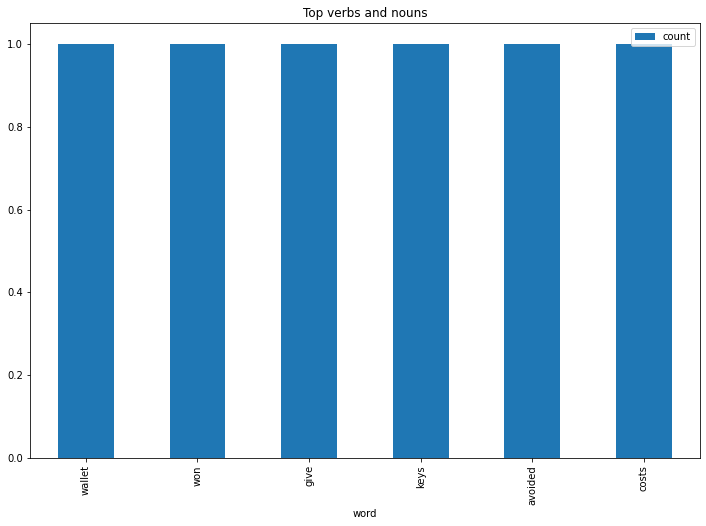

In [29]:
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [31]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [32]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [37]:
tweet=pd.read_csv("Elon_musk.csv")
tweet = [Text.strip() for Text in tweet.Text]
tweet= [Text for Text in tweet if Text]

In [39]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(tweet))
sentences[5:15]

['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It�s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won�t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elements o

In [40]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
909,"@kenyanwalstreet Not actually a payout, just a..."
910,"It may never pay out, as the stock can�t b� ht..."
911,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...


In [41]:
affinity_scores = afinn.set_index('word')['value'].to_dict()


In [43]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [44]:
calculate_sentiment(text = 'amazing')

4

In [45]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [46]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [47]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
181,There�s some great AI out ther� https://t.co/v...,10,48
222,"@PPathole @karpathy For a second there, I thou...",11,69
808,Might be able to� https://t.co/FB7e5nOq2E @Pri...,11,72
182,"Also, w� https://t.co/IYdKttVsqk @cleantechnic...",12,99
80,@teslaownersSV This is a good one @MrBeastYT I...,13,38
638,It�s� https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
578,The �open� areas� https://t.co/rabjKrtQlw @Sav...,14,138
710,We just haven�t observed the� https://t.co/mez...,15,72
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
104,@Erdayastronaut @SpaceX Was also thinking that...,16,94


In [48]:
sent_df['sentiment_value'].describe()

count    914.000000
mean       1.376368
std        2.693656
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [49]:
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
8,Tweets definitely do not represent real-world ...,0,8


In [51]:
sent_df['index']=range(0,len(sent_df))

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

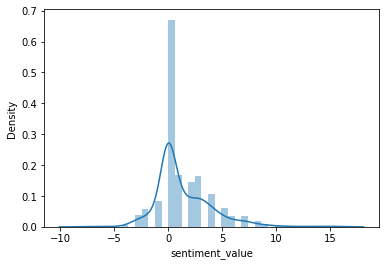

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

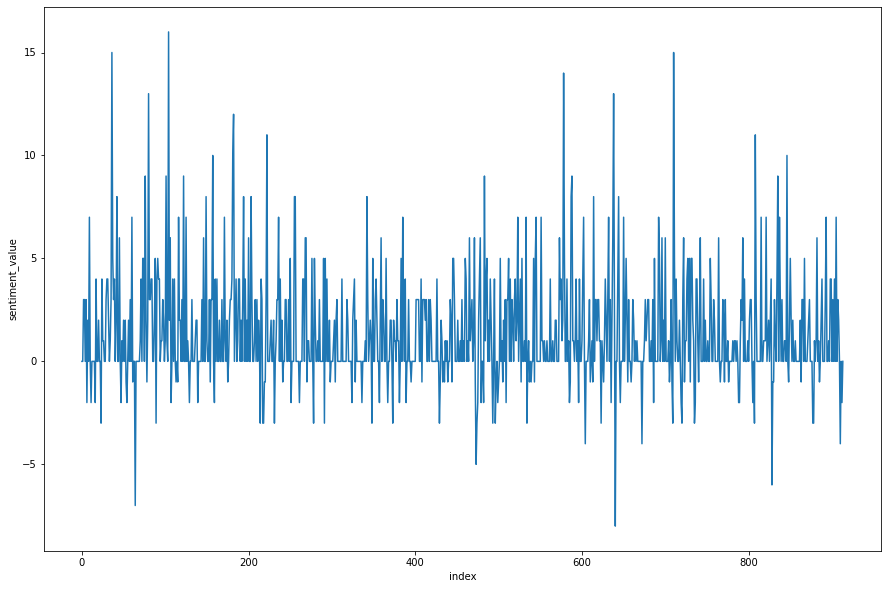

In [53]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

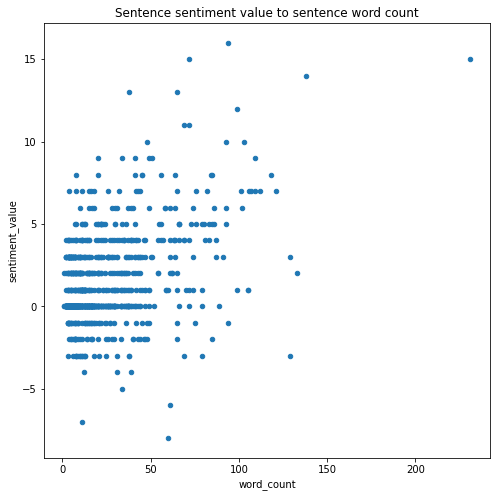

In [54]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')